### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



In [1]:
# Importing important packages
import numpy as np
import pandas as pd

### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [2]:
# Reading the dataset and dropping the blank values
Corgie_vehicle_df = pd.read_csv("vehicle.csv").dropna()
Corgie_vehicle_df.sample(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
527,109,49.0,103.0,186.0,57.0,11,206.0,32.0,23.0,156,212.0,630.0,186.0,65.0,12.0,21.0,192.0,201,car
654,100,47.0,88.0,190.0,60.0,10,171.0,38.0,21.0,155,186.0,440.0,169.0,59.0,15.0,18.0,201.0,210,car
830,97,37.0,70.0,173.0,66.0,7,151.0,43.0,19.0,129,167.0,346.0,119.0,65.0,0.0,16.0,201.0,208,bus
336,89,44.0,76.0,125.0,54.0,10,156.0,44.0,20.0,151,163.0,352.0,176.0,76.0,12.0,12.0,184.0,193,van
645,86,44.0,77.0,155.0,60.0,7,152.0,44.0,19.0,141,174.0,345.0,161.0,72.0,9.0,0.0,187.0,192,car


In [3]:
# Trying to evaluate the data 
# Shape of dataframe
Corgie_vehicle_df.shape

(813, 19)

In [4]:
# Info of dataframe
Corgie_vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [5]:
# Printing the dependent variable
Dependent_variable = Corgie_vehicle_df['class']
print("Dependent column data: \n", Dependent_variable)

Dependent column data: 
 0      van
1      van
2      car
3      van
4      bus
6      bus
7      van
8      van
10     van
11     car
12     bus
13     van
14     bus
15     car
16     van
17     bus
18     car
20     bus
21     van
22     bus
23     bus
24     car
25     van
26     car
27     car
28     bus
29     car
30     van
31     car
32     car
      ... 
816    van
817    car
818    car
819    car
820    car
821    car
822    van
823    car
824    car
825    car
826    car
827    car
828    van
829    van
830    bus
831    bus
832    car
833    car
834    car
835    bus
836    van
837    car
838    van
839    van
840    car
841    car
842    van
843    car
844    car
845    van
Name: class, Length: 813, dtype: object


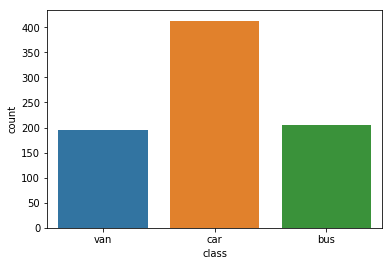

In [7]:
# Plotting the dependant variable
import seaborn as sns
sns.countplot(Corgie_vehicle_df['class'])

### Check for any missing values in the data 

In [8]:
#Checking if there is any missing value or not
Corgie_vehicle_df.isnull().values.any()

False

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [9]:
# Dropping the 'class' column
from scipy.stats import zscore
Corgie_vehicle_df = Corgie_vehicle_df.drop('class', axis = 1) # Object datatypes cannot be included while evaluating zscore

In [10]:
# Applying zscore to standardize/ normalize the data
Corgie_vehicle_df_z = Corgie_vehicle_df.apply(zscore)

In [11]:
Corgie_vehicle_df_z.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


### K - Means Clustering

### 4. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')  #for styling the graph with grid
from sklearn.cluster import KMeans
from scipy.spatial import distance

In [13]:
# Checking optimal number of clusters-
distortion = []

cluster_range = range(2, 12)   # expecting 3 to 4 clusters
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 5)
  clusters.fit(Corgie_vehicle_df_z)
  distortion.append(sum(np.min(distance.cdist(Corgie_vehicle_df_z, clusters.cluster_centers_, 'euclidean'), axis=1))/ Corgie_vehicle_df_z.shape[0])

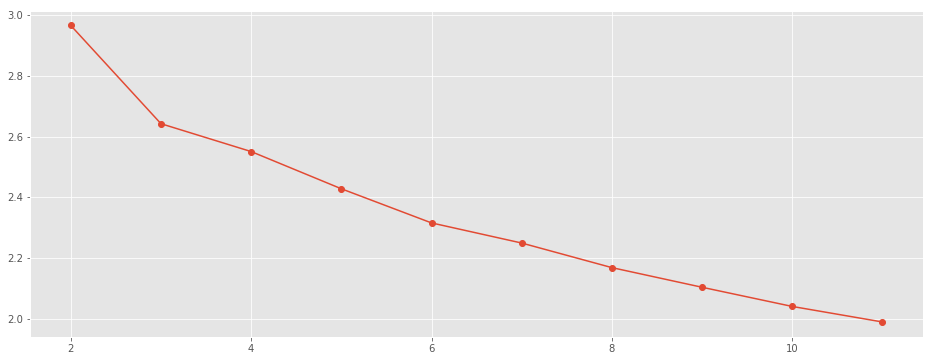

In [14]:
# Elbow plot, Scree Plot
plt.figure(figsize=(16, 6))
plt.plot(cluster_range, distortion, marker = "o" )

### Find out the optimal value of K

In [15]:
# From the above graph, we can find that the optimal value of K is 3.

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [16]:
# Cluster dataframe
cluster_df = KMeans(n_clusters = 3, random_state = 2)  # Number of clusters
cluster_df.fit(Corgie_vehicle_df_z)  # Fitting the input data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

### 5. Store the centroids in a dataframe with column names from the original dataset given 

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [17]:
# Centroid dataframe
centroid_df = pd.DataFrame(cluster_df.cluster_centers_, columns = list(Corgie_vehicle_df_z))
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.919871,-0.520093,-0.893208,-1.064356,-0.500422,-0.219074,-0.779121,0.865893,-0.745356,-0.484632,-0.782403,-0.783411,-0.384982,0.838787,-0.095243,-0.301716,-1.054206,-1.110695
1,1.130765,1.170942,1.195006,1.019095,0.215052,0.342508,1.271805,-1.190612,1.275484,1.092668,1.220381,1.281327,1.079542,-0.028795,0.162290,0.265665,-0.005356,0.183801
2,-0.233962,-0.573875,-0.307769,-0.030413,0.205073,-0.116532,-0.459042,0.325063,-0.487988,-0.536044,-0.413809,-0.463663,-0.601550,-0.619241,-0.061780,0.010668,0.812786,0.698973


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [18]:
# Getting the cluster labels
labels = cluster_df.predict(Corgie_vehicle_df_z)
labels

array([2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 1,
       2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0,
       0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 2, 1, 1,
       2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1,
       0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 1,
       0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 1, 1,
       2, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2,
       1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 0, 2,
       1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 0,
       2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0,
       2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 0, 2, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0,

## Hierarchical Clustering 

### 6. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [19]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size = [100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size = [50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size = [100,])

### 7. Combine all three arrays a,b,c into a dataframe

In [20]:
# Combining the arrays
D = np.concatenate((a, b, c), axis = 0)
D_df = pd.DataFrame(D)

In [21]:
D_df.head()

,0,1
0,9.397823,1.108049
1,11.551000,-0.724760
2,11.388384,3.789647
3,11.626603,0.738087
4,13.377407,0.409724


### 8. Use scatter matrix to print all the 3 distributions

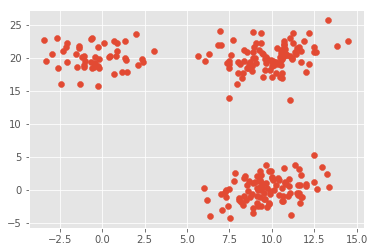

In [22]:
# Plotting the scatter matrix
plt.scatter(D_df[0], D_df[1])

### 9. Find out the linkage matrix

Use ward as linkage metric and distance as Eucledian

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [24]:
# Evaluating the linkage matrix
Linkage_matrix = linkage(D_df, 'ward')
Linkage_matrix

array([[4.40000000e+01, 9.90000000e+01, 6.42033992e-02, 2.00000000e+00],
       [1.02000000e+02, 1.25000000e+02, 7.52871742e-02, 2.00000000e+00],
       [9.00000000e+00, 4.60000000e+01, 7.92956010e-02, 2.00000000e+00],
       [1.95000000e+02, 2.01000000e+02, 8.29332570e-02, 2.00000000e+00],
       [1.90000000e+02, 2.08000000e+02, 9.44770336e-02, 2.00000000e+00],
       [3.00000000e+00, 4.00000000e+01, 9.50009692e-02, 2.00000000e+00],
       [6.90000000e+01, 8.20000000e+01, 9.77589193e-02, 2.00000000e+00],
       [5.00000000e+00, 5.70000000e+01, 9.84211563e-02, 2.00000000e+00],
       [2.50000000e+01, 4.30000000e+01, 9.91678310e-02, 2.00000000e+00],
       [1.56000000e+02, 1.81000000e+02, 1.00062442e-01, 2.00000000e+00],
       [1.82000000e+02, 1.88000000e+02, 1.01215452e-01, 2.00000000e+00],
       [6.70000000e+01, 8.90000000e+01, 1.15397485e-01, 2.00000000e+00],
       [1.09000000e+02, 1.14000000e+02, 1.24277601e-01, 2.00000000e+00],
       [1.54000000e+02, 2.43000000e+02, 1.30649788e

### 10. Plot the dendrogram for the consolidated dataframe

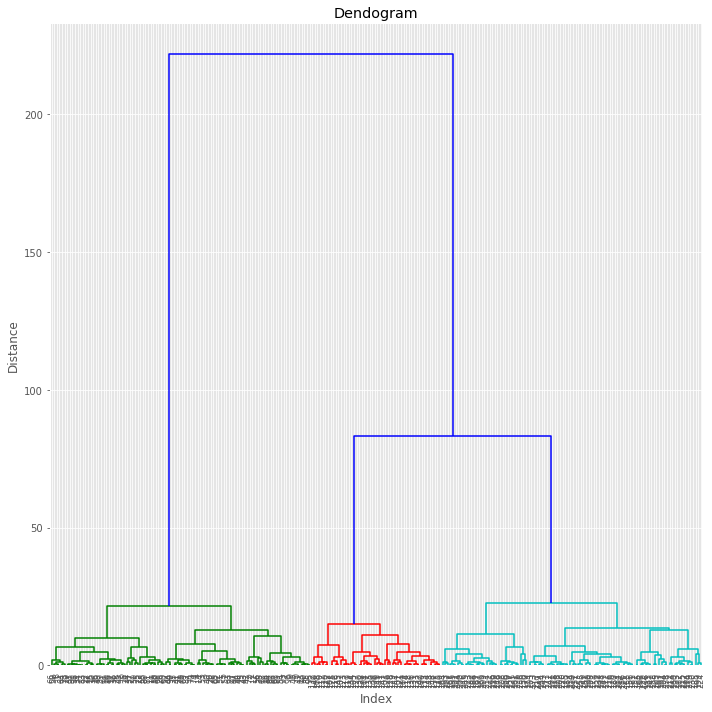

In [25]:
plt.figure(figsize=(10, 10))
plt.title('Dendogram') #Title of the plot
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(Linkage_matrix, leaf_rotation = 90., color_threshold = 30, leaf_font_size=8. )  #Dendogram plotting
plt.tight_layout()

### 11. Recreate the dendrogram for last 3 merged clusters 

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

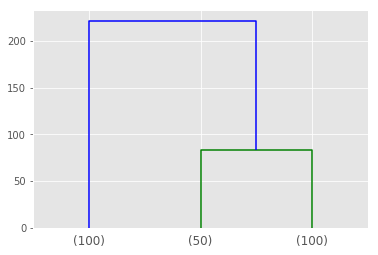

In [26]:
# Last 3 merged clusters of the dendogram
dendrogram(
    Linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

### 12. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [27]:
# From the above graph, the Optimal distance between clusters is approximately 70.

### 13. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [28]:
clusters = fcluster(Linkage_matrix, 79, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

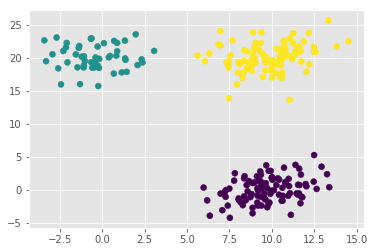

In [29]:
# Plotting the scatter matrix using the clusters
plt.scatter(D_df[0], D_df[1], c = clusters)